In [49]:
import pandas as pd
import scipy as sp
from scipy.sparse import diags
import numpy as np
from numpy import linalg as LA
import sys

import matplotlib.pyplot as plt

#importing seaborn for plotting
import seaborn as sns

#for plotting purposes
%pylab inline
sns.set_style('ticks')
sns.set_context('paper')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib as mpl

from scipy.signal import find_peaks

# mpl.rcParams
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['figure.figsize'] = [8, 16/3]

Populating the interactive namespace from numpy and matplotlib


### converting ladder to nts

In [47]:
filename = 'Eukaryote Total RNA Nano_2020-10-21_16-07-11'

Text(0.5, 1.0, 'Ladder Peaks: Eukaryote Total RNA Nano_2020-10-21_16-07-11')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'FU')

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 8 Text major ticklabel objects>)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

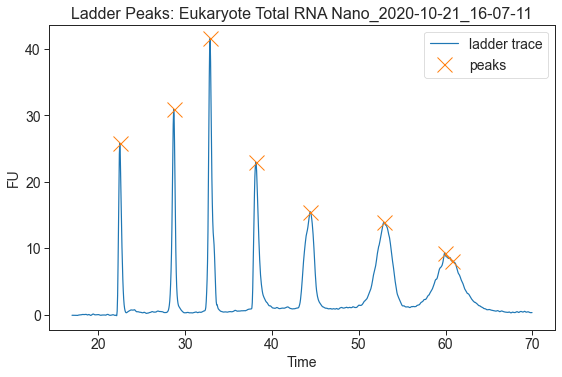

In [48]:
ladder_dict = {}
ladder_times = {}
ladder_values = {}
    
ladder_df = pd.read_csv(filename+'_Ladder.csv', skiprows=17)[:-1]
ladder_time = np.array(ladder_df['Time'].astype(float))
ladder_value = np.array(ladder_df['Value'].astype(float))


peaks,_ = find_peaks(ladder_value, height=7.5, distance=15)
ladder_dict = list(peaks[:6])

plot(ladder_time, ladder_value, label='ladder trace')
plot(ladder_time[peaks], ladder_value[peaks], 'x', label='peaks', markersize=15)
title('Ladder Peaks: '+filename, fontsize=16)
legend(fontsize=14)
xlabel('Time', fontsize=14)
ylabel('FU', fontsize=14)
xticks(fontsize=14)
yticks(fontsize=14)

tight_layout()

savefig(filename+'_ladder.png', dpi=300)

Text(0, 0.5, 'Calculated nts (from time)')

Text(0.5, 0, 'Ladder nts')

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 <a list of 11 Text major ticklabel objects>)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 <a list of 11 Text major ticklabel objects>)

Text(0.5, 1.0, 'Ladder polynomial fit: Eukaryote Total RNA Nano_2020-10-21_16-07-11')

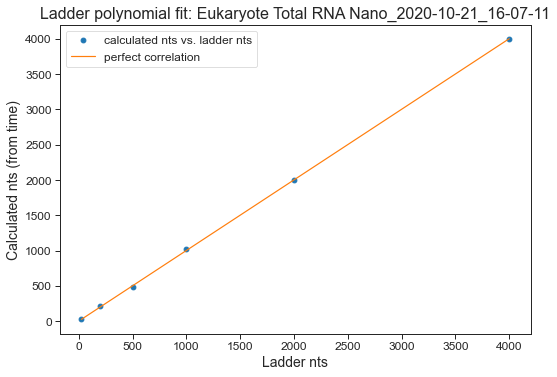

In [56]:
peak_times = ladder_time[ladder_dict]
# peak_times
peak_fu = np.array([25, 200, 500, 1000, 2000, 4000])

ladder_fit = np.polyfit(x=peak_times, y = peak_fu, deg = 4)
lf = np.poly1d(ladder_fit)
ladder_nts = lf

plot(peak_fu, lf(peak_times), 'o',label='calculated nts vs. ladder nts')
plot(peak_fu, peak_fu,label='perfect correlation')
ylabel('Calculated nts (from time)', fontsize=14)
xlabel('Ladder nts', fontsize=14)
yticks(fontsize=12)
xticks(fontsize=12)
title('Ladder polynomial fit: '+filename, fontsize=16)
legend(fontsize=12)
tight_layout()
savefig(filename+'_ladder_fit.png', dpi=300)

In [59]:
ls

Analyze_Run1.ipynb
Eukaryote Total RNA Nano_2020-10-21_16-07-11.xml
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Ladder.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Results.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Sample1.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Sample10.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Sample11.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Sample12.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Sample2.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Sample3.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Sample4.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Sample5.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Sample6.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Sample7.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Sample8.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_Sample9.csv
Eukaryote Total RNA Nano_2020-10-21_16-07-11_ladder.png
Eukaryote Total RNA Nano_2020-10-21_16-07-11_ladder_fit.png
Icon?


### converting samples to nucleotides as well

In [69]:
samples = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
num_samples = len(samples)

ncolumns=3
nrows = math.ceil(num_samples/ncolumns)

figure(figsize=(ncolumns*6, nrows*4+3))

samples_dict = {}
for i, sample in enumerate(samples):
    sample_df = pd.read_csv(filename+'_Sample'+sample+'.csv', skiprows=17)[:-1]
    samples_dict[sample] = sample_df
    times = np.array(sample_df['Time'].astype(float))
    sample_df['Nucleotides'] = ladder_nts(times)
    sample_df.to_csv(filename+'_'+sample+'_nts.csv')
    
# for i, sample in enumerate(ladder_nts):
#     nt_array = ladder_nts[sample](ladder_times[sample])
    
#     peaks_store = []
# #     heights_store = []
    
#     subplot(nrows,ncolumns,i+1)
    
#     #read in dataframe for per sample here
#     sample_df = samples_dict[sample]
    
#     timepoints = [0,0.5,1.0,1.5,2,3,4,5,18,24]
    
#     for i,time in enumerate(timepoints):
#         data = np.array(sample_df[sample_df['Timepoint']==time]['Value'])
        
#         peaks, _ = find_peaks(data, distance=50, height=2.5)
# #         peaks_store.append(peaks)
#         heights_store.append(data[peaks])

#         plot(nt_array[:int(len(nt_array)/2)],data[:int(len(nt_array)/2)], label=time)
#         plot(np.array(nt_array)[peaks], data[peaks], 'x',markersize=6)
#         ylabel('Flourescence Units', fontsize=14)
#         xlabel('Nucleotides', fontsize=14)
#         legend()
#         title(sample, fontweight='bold')
#         tight_layout()

# for sample in samples:
    

<Figure size 1296x1368 with 0 Axes>

,Time,Value,Nucleotides
0,17,-7.061768E-02,18.793740
1,17.05,-7.061768E-02,18.302936
2,17.1,-7.061768E-02,17.820609
3,17.15,-7.061768E-02,17.346796
4,17.2,-7.061768E-02,16.881533
...,...,...,...
1055,69.75,0.1160262,10912.089355
1056,69.8,0.1106837,10939.212014
1057,69.85,9.526337E-02,10966.377011
1058,69.9,5.515959E-02,10993.584375


,Time,Value,Nucleotides
0,17,-1.259995E-02,18.793740
1,17.05,-1.259995E-02,18.302936
2,17.1,-1.259995E-02,17.820609
3,17.15,-1.259995E-02,17.346796
4,17.2,-1.259995E-02,16.881533
...,...,...,...
1055,69.75,3.428661,10912.089355
1056,69.8,1.917604,10939.212014
1057,69.85,0.9756446,10966.377011
1058,69.9,0.1997273,10993.584375


,Time,Value,Nucleotides
0,17,2.025604E-02,18.793740
1,17.05,2.025604E-02,18.302936
2,17.1,2.025604E-02,17.820609
3,17.15,2.025604E-02,17.346796
4,17.2,2.025604E-02,16.881533
...,...,...,...
1055,69.75,-4.124701E-02,10912.089355
1056,69.8,-2.244478E-02,10939.212014
1057,69.85,1.544855E-02,10966.377011
1058,69.9,3.864893E-02,10993.584375


,Time,Value,Nucleotides
0,17,-3.289413E-02,18.793740
1,17.05,-3.289413E-02,18.302936
2,17.1,-3.289413E-02,17.820609
3,17.15,-3.289413E-02,17.346796
4,17.2,-3.289413E-02,16.881533
...,...,...,...
1055,69.75,7.610512E-02,10912.089355
1056,69.8,9.017526E-02,10939.212014
1057,69.85,9.187492E-02,10966.377011
1058,69.9,8.547714E-02,10993.584375


,Time,Value,Nucleotides
0,17,-4.101181E-02,18.793740
1,17.05,-4.101181E-02,18.302936
2,17.1,-4.101181E-02,17.820609
3,17.15,-4.101181E-02,17.346796
4,17.2,-4.101181E-02,16.881533
...,...,...,...
1055,69.75,0.244875,10912.089355
1056,69.8,0.2279171,10939.212014
1057,69.85,0.2158575,10966.377011
1058,69.9,0.2156818,10993.584375


,Time,Value,Nucleotides
0,17,3.295135E-02,18.793740
1,17.05,3.295135E-02,18.302936
2,17.1,3.295135E-02,17.820609
3,17.15,3.295135E-02,17.346796
4,17.2,3.295135E-02,16.881533
...,...,...,...
1055,69.75,0.3806759,10912.089355
1056,69.8,0.4177999,10939.212014
1057,69.85,0.4220729,10966.377011
1058,69.9,0.3984164,10993.584375


,Time,Value,Nucleotides
0,17,-0.108963,18.793740
1,17.05,-0.108963,18.302936
2,17.1,-0.108963,17.820609
3,17.15,-0.108963,17.346796
4,17.2,-0.108963,16.881533
...,...,...,...
1055,69.75,0.1824875,10912.089355
1056,69.8,0.1833043,10939.212014
1057,69.85,0.1700074,10966.377011
1058,69.9,0.1484496,10993.584375


,Time,Value,Nucleotides
0,17,1.882172E-02,18.793740
1,17.05,1.882172E-02,18.302936
2,17.1,1.882172E-02,17.820609
3,17.15,1.882172E-02,17.346796
4,17.2,1.882172E-02,16.881533
...,...,...,...
1055,69.75,0.3390026,10912.089355
1056,69.8,0.3255808,10939.212014
1057,69.85,0.3167401,10966.377011
1058,69.9,0.3212901,10993.584375


,Time,Value,Nucleotides
0,17,-7.342911E-02,18.793740
1,17.05,-7.342911E-02,18.302936
2,17.1,-7.342911E-02,17.820609
3,17.15,-7.342911E-02,17.346796
4,17.2,-7.342911E-02,16.881533
...,...,...,...
1055,69.75,5.965021E-02,10912.089355
1056,69.8,4.923423E-02,10939.212014
1057,69.85,3.407707E-02,10966.377011
1058,69.9,1.761556E-02,10993.584375


,Time,Value,Nucleotides
0,17,-0.0316124,18.793740
1,17.05,-0.0316124,18.302936
2,17.1,-0.0316124,17.820609
3,17.15,-0.0316124,17.346796
4,17.2,-0.0316124,16.881533
...,...,...,...
1055,69.75,9.491806E-02,10912.089355
1056,69.8,0.1040766,10939.212014
1057,69.85,0.1157186,10966.377011
1058,69.9,0.1299881,10993.584375


,Time,Value,Nucleotides
0,17,3.866577E-02,18.793740
1,17.05,3.866577E-02,18.302936
2,17.1,3.866577E-02,17.820609
3,17.15,3.866577E-02,17.346796
4,17.2,3.866577E-02,16.881533
...,...,...,...
1055,69.75,1.164921E-02,10912.089355
1056,69.8,1.680928E-02,10939.212014
1057,69.85,2.835897E-02,10966.377011
1058,69.9,0.0355103,10993.584375


,Time,Value,Nucleotides
0,17,5.035019E-02,18.793740
1,17.05,5.035019E-02,18.302936
2,17.1,5.035019E-02,17.820609
3,17.15,5.035019E-02,17.346796
4,17.2,5.035019E-02,16.881533
...,...,...,...
1055,69.75,8.552817E-02,10912.089355
1056,69.8,6.647652E-02,10939.212014
1057,69.85,7.171007E-02,10966.377011
1058,69.9,6.493232E-02,10993.584375


<Figure size 1296x1368 with 0 Axes>